# Pymaceuticals Inc.
---

### Analysis

- The treatments analyzed were 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin.' 
- It seems that the most effective treatments were 'Capomulin' and 'Ramicane.'
- - Effectivness was scored on the total remaining tumor volume (mm3) in the body of the mouse after the treatment was completed.  
- Specifically for mouse y739 the treatment used (Capomulin) led to a substantial decrease in volume of tumor cells present within the body of the mouse. 
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge( study_results,mouse_metadata, on='Mouse ID')

# Display the number of unique mice IDs
unique_mice_count = combined_data['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mice_count)

# Check for any mouse ID with duplicate time points
duplicate_timepoints = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
if not duplicate_timepoints.empty:
    print("\nMouse IDs with duplicate time points:")
    print(duplicate_timepoints[['Mouse ID', 'Timepoint']])

    # Create a new DataFrame where data associated with mice having duplicate time points is removed
    cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
    print("\nCleaned DataFrame with duplicate time points removed:")
    print(cleaned_data.head())
else:
    print("\nNo mouse IDs with duplicate time points found.")
    cleaned_data = combined_data.copy()

# Display the data table for preview
cleaned_data.head()

Number of unique mice IDs: 249

Mouse IDs with duplicate time points:
    Mouse ID  Timepoint
860     g989          0
861     g989          0
862     g989          5
863     g989          5
864     g989         10
865     g989         10
866     g989         15
867     g989         15
868     g989         20
869     g989         20

Cleaned DataFrame with duplicate time points removed:
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [12]:
# Checking the number of mice.
print(len(cleaned_data))

1883


In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Identify duplicate mice by ID number that show up for Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate mice
if not duplicate_mice.empty:
    print("Duplicate mice by ID number that show up for Mouse ID and Timepoint:")
    print(duplicate_mice[['Mouse ID', 'Timepoint']])
else:
    print("No duplicate mice found for Mouse ID and Timepoint.")


Duplicate mice by ID number that show up for Mouse ID and Timepoint:
    Mouse ID  Timepoint
860     g989          0
861     g989          0
862     g989          5
863     g989          5
864     g989         10
865     g989         10
866     g989         15
867     g989         15
868     g989         20
869     g989         20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
cleaned_data = combined_data.drop_duplicates(subset='Mouse ID', keep='first')

# Display the first few rows of the clean DataFrame
print("Clean DataFrame with duplicate mice removed:")
cleaned_data.head()


Clean DataFrame with duplicate mice removed:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
print(len(cleaned_data))

249


## Summary Statistics

In [20]:
print(cleaned_data.columns)

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the data by regimen and calculate the required statistics
grouped_data = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']

# Calculate mean, median, variance, standard deviation, and SEM for each regimen
mean_tumor_volume = grouped_data.mean()
median_tumor_volume = grouped_data.median()
variance_tumor_volume = grouped_data.var()
std_dev_tumor_volume = grouped_data.std()
sem_tumor_volume = grouped_data.sem()

# Create a summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_tumor_volume,
    'Median': median_tumor_volume,
    'Variance': variance_tumor_volume,
    'Standard Deviation': std_dev_tumor_volume,
    'SEM': sem_tumor_volume
})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics DataFrame
summary_stats.columns = ['Tumor Mean', 'Tumor Median', 'Tumor Variance', 'Tumor Standard Deviation', ' Tumor SEM']
summary_stats

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

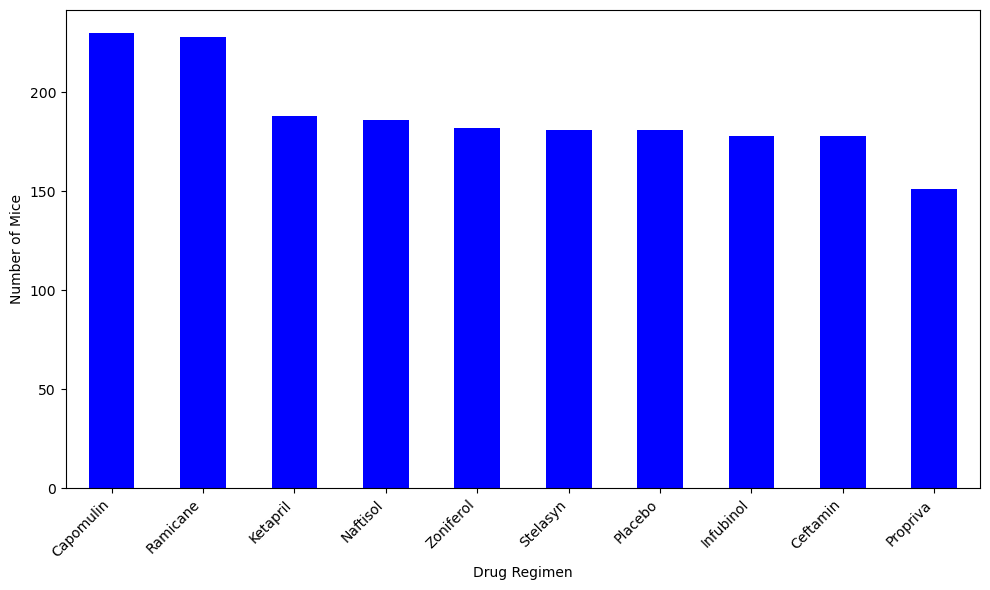

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
plt.figure(figsize=(10, 6))

regimen_counts.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

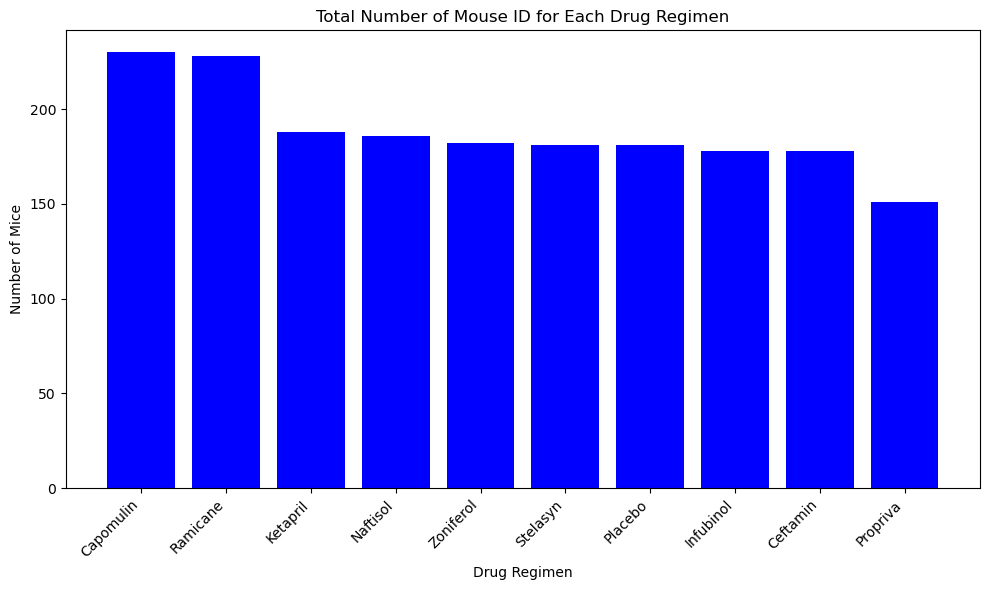

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_names = regimen_counts.index
counts = regimen_counts.values

# Create bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts, color='blue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Total Number of Mouse ID for Each Drug Regimen')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

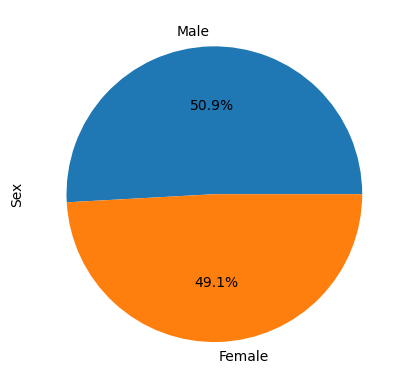

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data['Sex'].value_counts()

gender_counts.plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Sex')

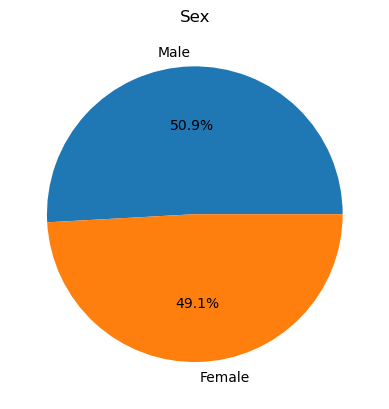

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = gender_counts.index
counts = gender_counts.values
plt.pie(counts, labels=gender_labels, autopct='%1.1f%%')
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data (for plotting)
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_volume)
    
    # Calculate the interquartile range (IQR) and quantitatively determine if there are any potential outliers
    quartiles = tumor_volume.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print results
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


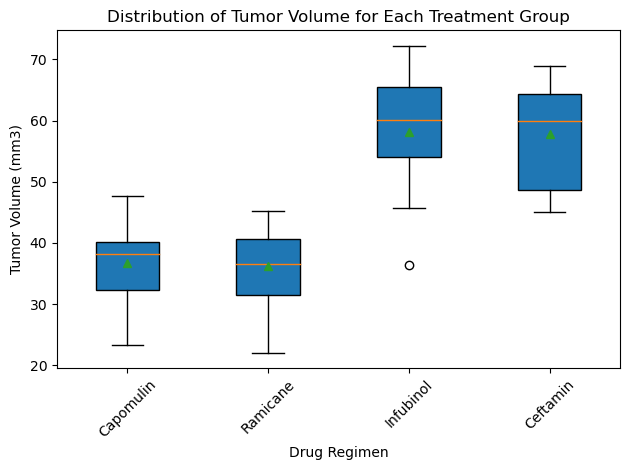

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a boxplot
plt.boxplot(tumor_volume_data, labels=treatments, patch_artist=True, showmeans=True)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Line and Scatter Plots

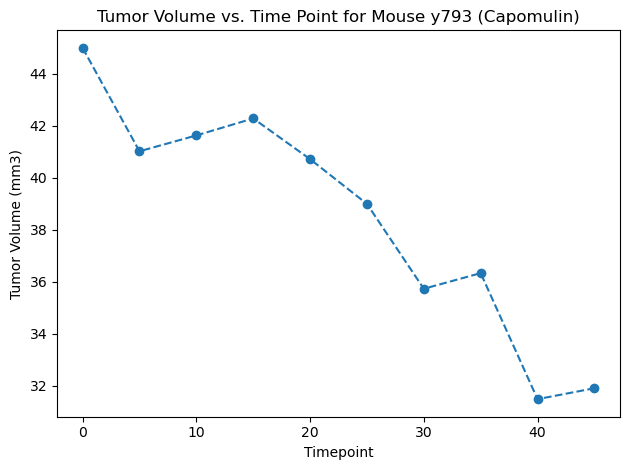

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse ID treated with Capomulin
mouse_id = 'y793'  

# Extract the tumor volume and time point data for the chosen mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot the tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='--')

# Add labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')

# Show plot
plt.tight_layout()
plt.show()

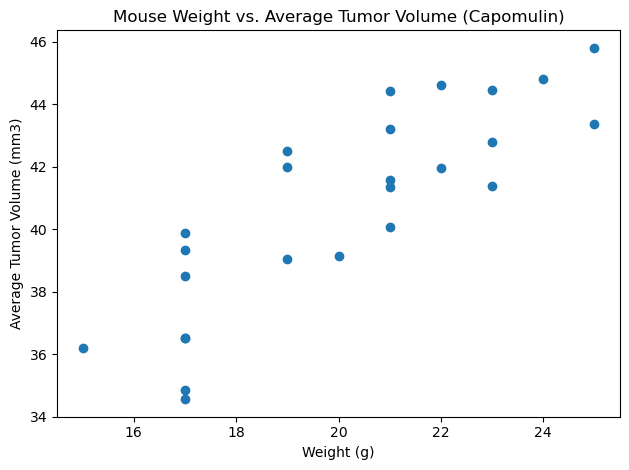

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Group the filtered DataFrame by mouse ID and calculate the average tumor volume and weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Plot the average tumor volume vs. weight
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')

# Show plot
plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


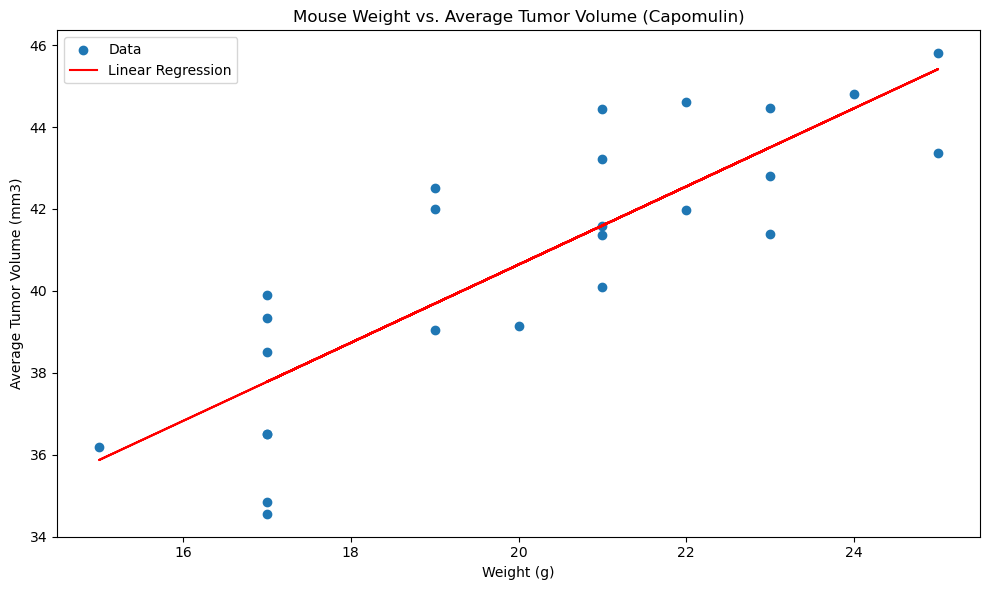

In [68]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(average_data['Weight (g)'], 
                                      average_data['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(average_data['Weight (g)'], 
                                                      average_data['Tumor Volume (mm3)'])

# Calculate the predicted tumor volume using the linear regression model
predicted_tumor_volume = slope * average_data['Weight (g)'] + intercept

# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_data['Weight (g)'], 
            average_data['Tumor Volume (mm3)'], 
            label='Data')
plt.plot(average_data['Weight (g)'], 
         predicted_tumor_volume, color='red', 
         label='Linear Regression')

# Add labels, title, and legend
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()